<a href="https://colab.research.google.com/github/Dohun-Im/Machine_Learning/blob/master/%EC%B9%B4%EC%B9%B4%EC%98%A4%ED%86%A1_%EB%B0%8F_%EC%BD%94%EC%8A%A4%ED%94%BC_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finance-datareader

In [6]:
import os, re, codecs
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import matplotlib.pyplot as plt


In [253]:
df = fdr.DataReader(symbol='035720',start='2001-12-10')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-12-10,6548,6923,6263,6852,2248699,0.066625
2001-12-11,6692,6763,6433,6478,977473,-0.054583
2001-12-12,6602,7217,6566,6977,2356569,0.077030
2001-12-13,6869,7307,6709,6995,2246918,0.002580
2001-12-14,6789,7066,6522,6549,948617,-0.063760
...,...,...,...,...,...,...
2021-12-06,122500,122500,120500,121000,1477396,-0.020243
2021-12-07,121500,122000,120000,120500,1218740,-0.004132
2021-12-08,121500,123500,120500,121000,2288195,0.004149


In [255]:
df.to_csv('/content/drive/MyDrive/kakao.csv')

In [205]:
samsung_dfA = df[["Close"]]

samsung_dfA = samsung_dfA.reset_index()

samsung_dfA.columns = ['day', 'price']

samsung_dfA

,day,price
0,2001-12-10,6852
1,2001-12-11,6478
2,2001-12-12,6977
3,2001-12-13,6995
4,2001-12-14,6549
...,...,...
4940,2021-12-06,121000
4941,2021-12-07,120500
4942,2021-12-08,121000
4943,2021-12-09,122500


In [206]:
samsung_dfA['day'] = pd.to_datetime(samsung_dfA['day'])

samsung_dfA.index = samsung_dfA['day']
samsung_dfA.set_index('day', inplace=True)
samsung_dfA

,price
day,
2001-12-10,6852
2001-12-11,6478
2001-12-12,6977
2001-12-13,6995
2001-12-14,6549
...,...
2021-12-06,121000
2021-12-07,120500
2021-12-08,121000


In [207]:
samsung_train_dfA = samsung_dfA[:-15]
samsung_train_dfA
samsung_test_dfA = samsung_dfA[-15:]
samsung_test_dfA

,price
day,
2021-11-22,128500
2021-11-23,124500
2021-11-24,124500
2021-11-25,128000
2021-11-26,125500
2021-11-29,123000
2021-11-30,122000
2021-12-01,122500
2021-12-02,122500


In [208]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [239]:
model = ARIMA(samsung_train_dfA.price.values, order = (2,2,4))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)

In [241]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 4928
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -40074.004
Method:                       css-mle   S.D. of innovations            822.551
Date:                Fri, 10 Dec 2021   AIC                          80162.008
Time:                        08:12:22   BIC                          80207.527
Sample:                             2   HQIC                         80177.973
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.0976      0.030     -3.300      0.001      -0.156      -0.040
ar.L2.D2.y    -0.9094      0.023    -38.900      0.000      -0.955      -0.864
ma.L1.D2.y    -0.8258      0.032    -25.815      0.0

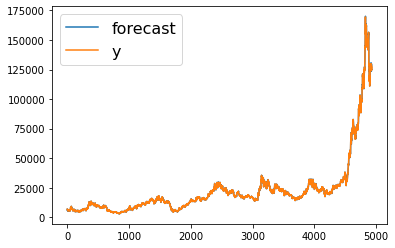

In [242]:
fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49892 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51228 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44284 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52769 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

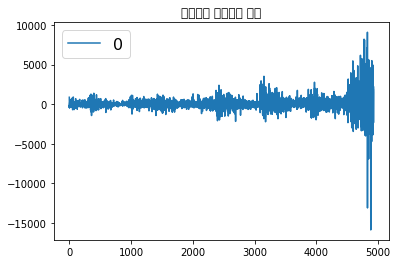

In [243]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [244]:
forecast_data = model_fit.forecast(steps=15)

pred_arima_y = forecast_data[0].tolist()
test_y = samsung_test_dfA.price.values

In [245]:
pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

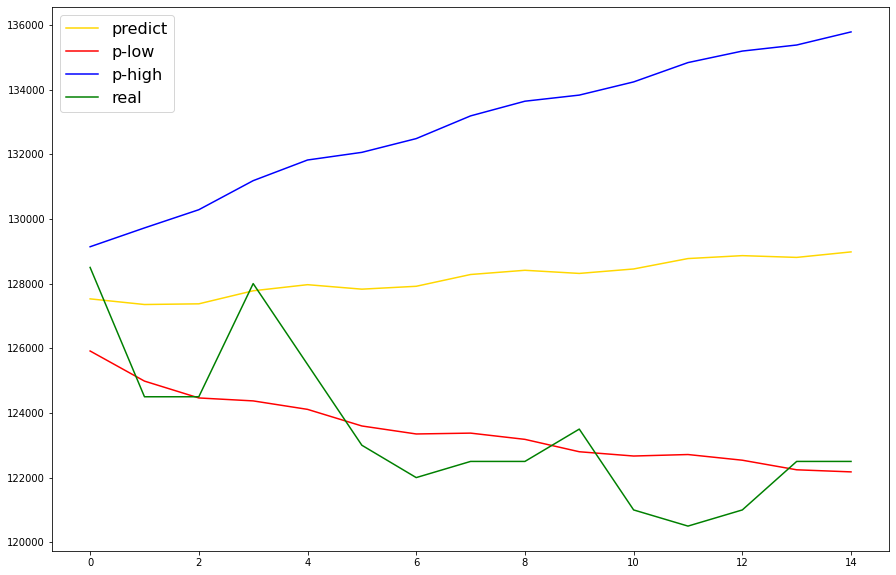

In [246]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['predict', 'p-low','p-high','real'])
plt.show()

In [153]:
df = df.rename_axis('Date').reset_index()
df

,Date,Open,High,Low,Close,Volume,Change
0,2001-12-10,6548,6923,6263,6852,2248699,0.066625
1,2001-12-11,6692,6763,6433,6478,977473,-0.054583
2,2001-12-12,6602,7217,6566,6977,2356569,0.077030
3,2001-12-13,6869,7307,6709,6995,2246918,0.002580
4,2001-12-14,6789,7066,6522,6549,948617,-0.063760
...,...,...,...,...,...,...,...
4940,2021-12-06,122500,122500,120500,121000,1477396,-0.020243
4941,2021-12-07,121500,122000,120000,120500,1218740,-0.004132
4942,2021-12-08,121500,123500,120500,121000,2288195,0.004149
4943,2021-12-09,120500,122500,120000,122500,2338843,0.012397


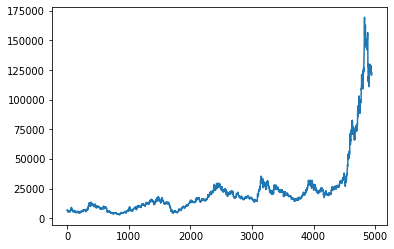

In [154]:
df['Close'].plot()

In [155]:
df_samsung = df[['Date','Close']]
df_samsung

,Date,Close
0,2001-12-10,6852
1,2001-12-11,6478
2,2001-12-12,6977
3,2001-12-13,6995
4,2001-12-14,6549
...,...,...
4940,2021-12-06,121000
4941,2021-12-07,120500
4942,2021-12-08,121000
4943,2021-12-09,122500


In [156]:
df_samsung.columns = ['ds','y']
df_samsung

,ds,y
0,2001-12-10,6852
1,2001-12-11,6478
2,2001-12-12,6977
3,2001-12-13,6995
4,2001-12-14,6549
...,...,...
4940,2021-12-06,121000
4941,2021-12-07,120500
4942,2021-12-08,121000
4943,2021-12-09,122500


In [157]:
samsung_train_df = df_samsung[:-15]
samsung_test_df =  df_samsung[-15:]

In [158]:
from fbprophet import Prophet

In [159]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [160]:
prophet.fit(samsung_train_df)

In [161]:
future_data = prophet.make_future_dataframe(periods=15, freq='d')
forecast_data = prophet.predict(future_data)

In [162]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-12-10,-2791.456396,-5811.040395,18122.164585,-2791.456396,-2791.456396,-3.6501,-3.6501,-3.6501,-3.307919,-3.307919,-3.307919,-0.156618,-0.156618,-0.156618,0.498799,0.498799,0.498799,0.0,0.0,0.0,6442.456032
1,2001-12-11,-2786.652586,-5969.147973,18177.201868,-2786.652586,-2786.652586,-3.6501,-3.6501,-3.6501,-3.327864,-3.327864,-3.327864,-0.182436,-0.182436,-0.182436,0.504672,0.504672,0.504672,0.0,0.0,0.0,6486.947814
2,2001-12-12,-2781.848777,-6695.666556,17945.501101,-2781.848777,-2781.848777,-3.6501,-3.6501,-3.6501,-3.325645,-3.325645,-3.325645,-0.184865,-0.184865,-0.184865,0.509321,0.509321,0.509321,0.0,0.0,0.0,6469.591632
3,2001-12-13,-2777.044967,-5994.650349,17848.136053,-2777.044967,-2777.044967,-3.6501,-3.6501,-3.6501,-3.335071,-3.335071,-3.335071,-0.197767,-0.197767,-0.197767,0.512796,0.512796,0.512796,0.0,0.0,0.0,6484.596301
4,2001-12-14,-2772.241157,-5500.166504,18380.042823,-2772.241157,-2772.241157,-3.6501,-3.6501,-3.6501,-3.325784,-3.325784,-3.325784,-0.190839,-0.190839,-0.190839,0.515155,0.515155,0.515155,0.0,0.0,0.0,6447.633441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,2021-11-30,-39214.030144,84482.787014,108424.966882,-39214.030144,-39214.030144,-3.6501,-3.6501,-3.6501,-3.461486,-3.461486,-3.461486,-0.182436,-0.182436,-0.182436,0.371050,0.371050,0.371050,0.0,0.0,0.0,96524.769981
4941,2021-12-01,-39241.064307,82994.879963,107244.184270,-39241.064307,-39241.064307,-3.6501,-3.6501,-3.6501,-3.446057,-3.446057,-3.446057,-0.184865,-0.184865,-0.184865,0.388908,0.388908,0.388908,0.0,0.0,0.0,95985.887545
4942,2021-12-02,-39268.098469,84069.695443,107882.305824,-39268.098469,-39268.098469,-3.6501,-3.6501,-3.6501,-3.442022,-3.442022,-3.442022,-0.197767,-0.197767,-0.197767,0.405845,0.405845,0.405845,0.0,0.0,0.0,95893.562333
4943,2021-12-03,-39295.132632,83884.301944,107537.646639,-39295.132632,-39295.132632,-3.6501,-3.6501,-3.6501,-3.419189,-3.419189,-3.419189,-0.190839,-0.190839,-0.190839,0.421750,0.421750,0.421750,0.0,0.0,0.0,95062.359830


In [163]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4940,2021-11-30,96524.769981,84482.787014,108424.966882
4941,2021-12-01,95985.887545,82994.879963,107244.184270
4942,2021-12-02,95893.562333,84069.695443,107882.305824
4943,2021-12-03,95062.359830,83884.301944,107537.646639
4944,2021-12-04,69101.072336,56756.656128,80982.326721


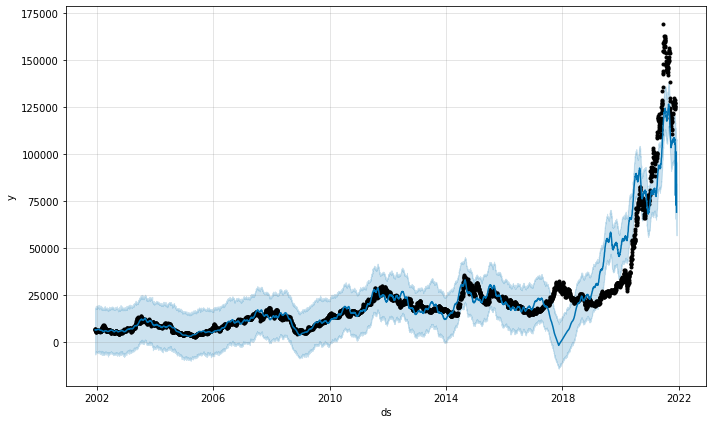

In [164]:
fig1 = prophet.plot(forecast_data)

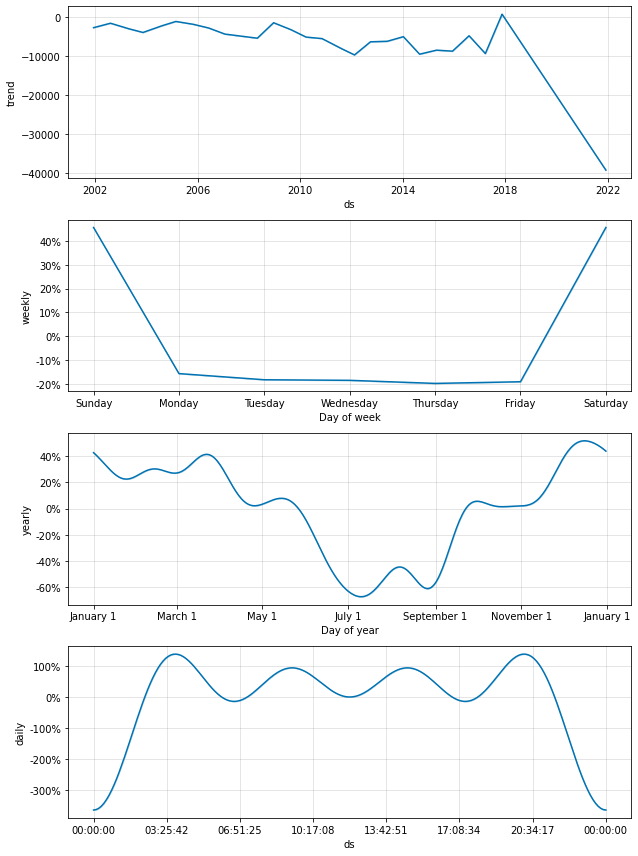

In [165]:
fig2 = prophet.plot_components(forecast_data)

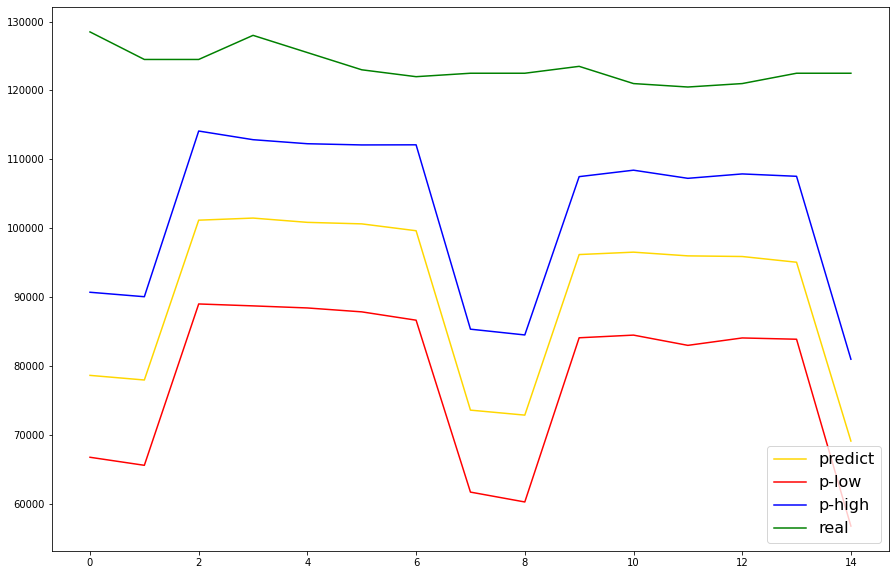

In [166]:
plt.figure(figsize=(15, 10))
pred_fbprophet_y = forecast_data.yhat.values[-15:]

test_y = samsung_test_df.y.values

pred_y_lower = forecast_data.yhat_lower.values[-15:]

pred_y_upper = forecast_data.yhat_upper.values[-15:]

plt.plot(pred_fbprophet_y, color = 'gold')

plt.plot(pred_y_lower, color = 'red')

plt.plot(pred_y_upper, color = 'blue')

plt.plot(test_y, color = 'green')

plt.legend(['predict', 'p-low','p-high','real'])


In [167]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

In [168]:
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,127200.375858,78637.193715,128500
1,127133.030656,77965.488220,124500
2,127260.113078,101167.951101,124500
3,127235.890081,101472.706855,128000
4,127320.643371,100851.024121,125500
5,127319.803461,100630.799635,123000
6,127379.973953,99634.696906,122000
7,127391.667359,73591.951440,122500
8,127437.467424,72866.941884,122500
9,127455.771561,96177.506935,123500


Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.



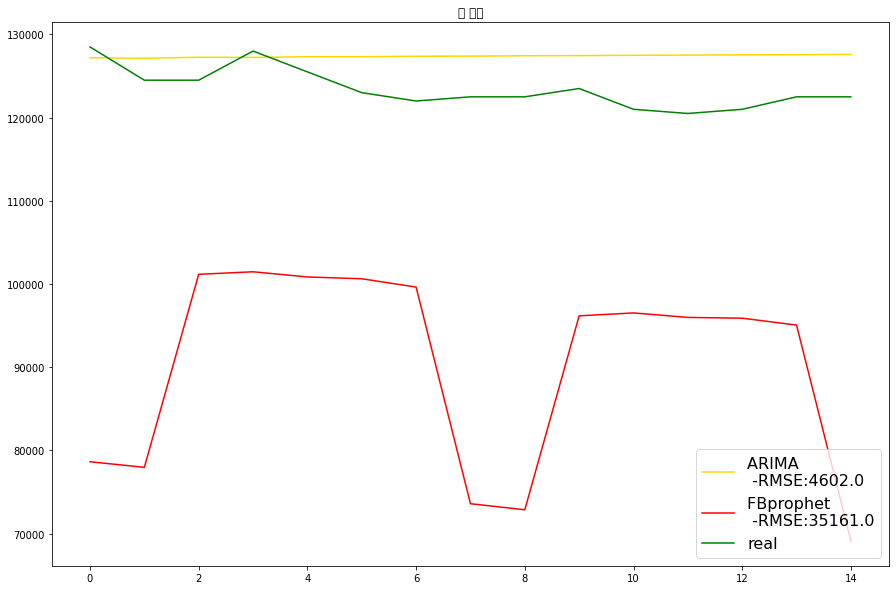

In [169]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

plt.plot(df[['ARIMA 예측값']], color = 'gold')

plt.plot(df[['FBprophet 예측값']], color = 'red')

plt.plot(df[['실제값']], color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'real'])
plt.title("값 비교")

In [172]:
df_k = fdr.DataReader(symbol='KS11',start='2001-12-10')
df_k

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2001-12-10,668.77,701.36,702.01,665.74,669060000.0,-0.0507
2001-12-11,670.08,659.76,671.68,655.65,565260000.0,0.0020
2001-12-12,681.43,667.01,683.26,658.17,539220000.0,0.0169
2001-12-13,676.59,682.47,684.31,667.95,577060000.0,-0.0071
2001-12-14,665.20,666.99,676.66,660.76,498290000.0,-0.0168
...,...,...,...,...,...,...
2021-12-06,2973.25,2954.82,2983.50,2932.49,479910000.0,0.0017
2021-12-07,2991.72,2973.84,2992.31,2960.90,541370000.0,0.0062
2021-12-08,3001.80,3017.93,3036.13,2995.34,488250000.0,0.0034


In [177]:
k = df_k[["Close"]]

k = k.reset_index()

k.columns = ['day', 'price']

k

,day,price
0,2001-12-10,668.77
1,2001-12-11,670.08
2,2001-12-12,681.43
3,2001-12-13,676.59
4,2001-12-14,665.20
...,...,...
4941,2021-12-06,2973.25
4942,2021-12-07,2991.72
4943,2021-12-08,3001.80
4944,2021-12-09,3029.57


In [178]:
k['day'] = pd.to_datetime(k['day'])

k.index = samsung_dfA['day']
k.set_index('day', inplace=True)
k

,price
day,
2001-12-10,668.77
2001-12-11,670.08
2001-12-12,681.43
2001-12-13,676.59
2001-12-14,665.20
...,...
2021-12-06,2973.25
2021-12-07,2991.72
2021-12-08,3001.80


In [179]:
k_train_df = k[:-15]
k_train_df
k_test_df = k[-15:]
k_test_df

,price
day,
2021-11-22,3013.25
2021-11-23,2997.33
2021-11-24,2994.29
2021-11-25,2980.27
2021-11-26,2936.44
2021-11-29,2909.32
2021-11-30,2839.01
2021-12-01,2899.72
2021-12-02,2945.27


In [180]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [181]:
model = ARIMA(k_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True,start_ar_lags = 4)

In [182]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4930
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -21895.250
Method:                       css-mle   S.D. of innovations             20.538
Date:                Fri, 10 Dec 2021   AIC                          43802.500
Time:                        07:26:52   BIC                          43841.518
Sample:                             1   HQIC                         43816.185
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4671      0.296      1.580      0.114      -0.112       1.047
ar.L1.D.y      0.7394      0.013     57.433      0.000       0.714       0.765
ar.L2.D.y     -0.9659      0.011    -89.064      0.0

In [184]:
forecast_data = model_fit.forecast(steps=15)

pred_arima_y = forecast_data[0].tolist()
test_y = k_test_df.price.values

In [185]:
pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

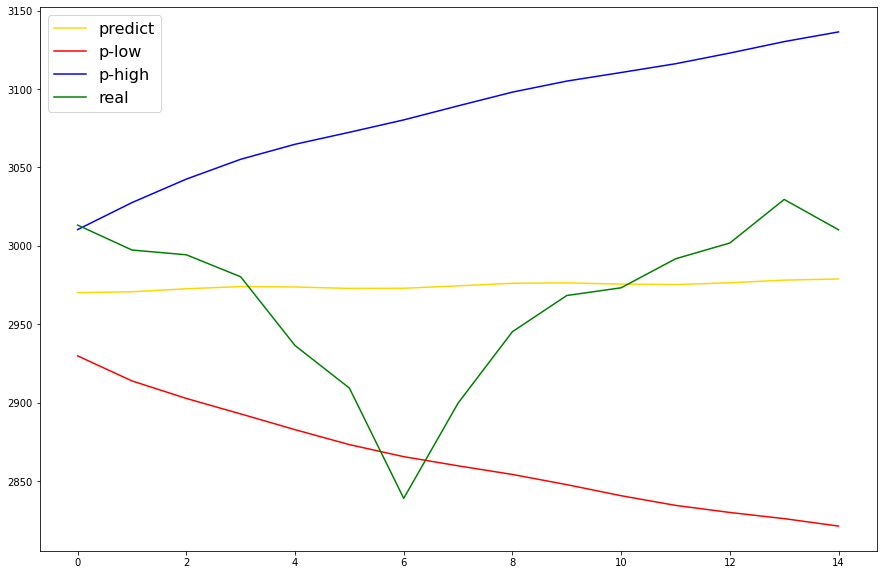

In [186]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['predict', 'p-low','p-high','real'])
plt.show()

In [187]:
df_k = df_k.rename_axis('Date').reset_index()
df_k

,Date,Close,Open,High,Low,Volume,Change
0,2001-12-10,668.77,701.36,702.01,665.74,669060000.0,-0.0507
1,2001-12-11,670.08,659.76,671.68,655.65,565260000.0,0.0020
2,2001-12-12,681.43,667.01,683.26,658.17,539220000.0,0.0169
3,2001-12-13,676.59,682.47,684.31,667.95,577060000.0,-0.0071
4,2001-12-14,665.20,666.99,676.66,660.76,498290000.0,-0.0168
...,...,...,...,...,...,...,...
4941,2021-12-06,2973.25,2954.82,2983.50,2932.49,479910000.0,0.0017
4942,2021-12-07,2991.72,2973.84,2992.31,2960.90,541370000.0,0.0062
4943,2021-12-08,3001.80,3017.93,3036.13,2995.34,488250000.0,0.0034
4944,2021-12-09,3029.57,3007.00,3029.57,3001.55,496360.0,0.0093


In [189]:
df_kk = df_k[['Date','Close']]
df_kk

,Date,Close
0,2001-12-10,668.77
1,2001-12-11,670.08
2,2001-12-12,681.43
3,2001-12-13,676.59
4,2001-12-14,665.20
...,...,...
4941,2021-12-06,2973.25
4942,2021-12-07,2991.72
4943,2021-12-08,3001.80
4944,2021-12-09,3029.57


In [190]:
df_kk.columns = ['ds','y']
df_kk

,ds,y
0,2001-12-10,668.77
1,2001-12-11,670.08
2,2001-12-12,681.43
3,2001-12-13,676.59
4,2001-12-14,665.20
...,...,...
4941,2021-12-06,2973.25
4942,2021-12-07,2991.72
4943,2021-12-08,3001.80
4944,2021-12-09,3029.57


In [191]:
df_kk_train = df_kk[:-15]
df_kk_test =  df_kk[-15:]

In [192]:
from fbprophet import Prophet

In [193]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [194]:
prophet.fit(df_kk_train)

In [195]:
future_data = prophet.make_future_dataframe(periods=15, freq='d')
forecast_data = prophet.predict(future_data)

In [196]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-12-10,151.784360,536.422422,982.684945,151.784360,151.784360,3.954627,3.954627,3.954627,4.114418,4.114418,4.114418,0.185899,0.185899,0.185899,-0.026108,-0.026108,-0.026108,0.0,0.0,0.0,776.288644
1,2001-12-11,151.779371,563.103794,1004.783291,151.779371,151.779371,3.954627,3.954627,3.954627,4.131127,4.131127,4.131127,0.200180,0.200180,0.200180,-0.023679,-0.023679,-0.023679,0.0,0.0,0.0,778.799285
2,2001-12-12,151.774382,566.032976,1003.629731,151.774382,151.774382,3.954627,3.954627,3.954627,4.133817,4.133817,4.133817,0.200617,0.200617,0.200617,-0.021427,-0.021427,-0.021427,0.0,0.0,0.0,779.181876
3,2001-12-13,151.769392,559.249324,1005.837195,151.769392,151.769392,3.954627,3.954627,3.954627,4.138454,4.138454,4.138454,0.203180,0.203180,0.203180,-0.019352,-0.019352,-0.019352,0.0,0.0,0.0,779.860103
4,2001-12-14,151.764403,563.292670,982.876756,151.764403,151.764403,3.954627,3.954627,3.954627,4.135959,4.135959,4.135959,0.198781,0.198781,0.198781,-0.017448,-0.017448,-0.017448,0.0,0.0,0.0,779.455775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,2021-11-30,543.850881,2548.281161,2998.216858,543.850881,543.850881,3.954627,3.954627,3.954627,4.099539,4.099539,4.099539,0.200180,0.200180,0.200180,-0.055268,-0.055268,-0.055268,0.0,0.0,0.0,2773.388663
4942,2021-12-01,543.943246,2537.704580,2994.701496,543.943246,543.943246,3.954627,3.954627,3.954627,4.102764,4.102764,4.102764,0.200617,0.200617,0.200617,-0.052480,-0.052480,-0.052480,0.0,0.0,0.0,2775.613884
4943,2021-12-02,544.035612,2562.845180,2990.173602,544.035612,544.035612,3.954627,3.954627,3.954627,4.108255,4.108255,4.108255,0.203180,0.203180,0.203180,-0.049551,-0.049551,-0.049551,0.0,0.0,0.0,2779.072689
4944,2021-12-03,544.127977,2563.221088,2994.602552,544.127977,544.127977,3.954627,3.954627,3.954627,4.106882,4.106882,4.106882,0.198781,0.198781,0.198781,-0.046526,-0.046526,-0.046526,0.0,0.0,0.0,2778.797147


In [197]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4941,2021-11-30,2773.388663,2548.281161,2998.216858
4942,2021-12-01,2775.613884,2537.704580,2994.701496
4943,2021-12-02,2779.072689,2562.845180,2990.173602
4944,2021-12-03,2778.797147,2563.221088,2994.602552
4945,2021-12-04,2403.739168,2171.361691,2618.325454


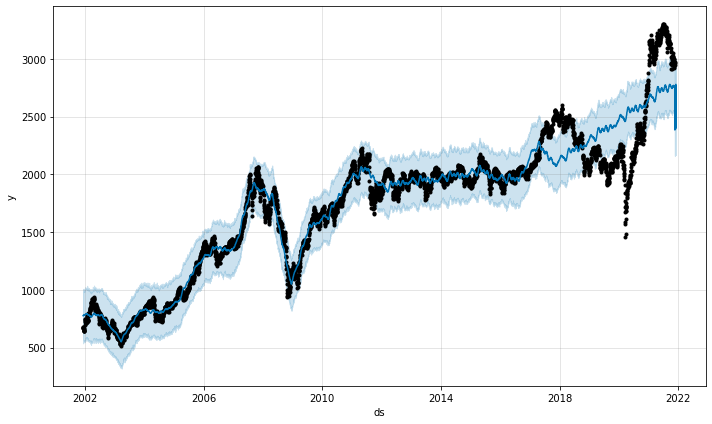

In [198]:
fig1 = prophet.plot(forecast_data)

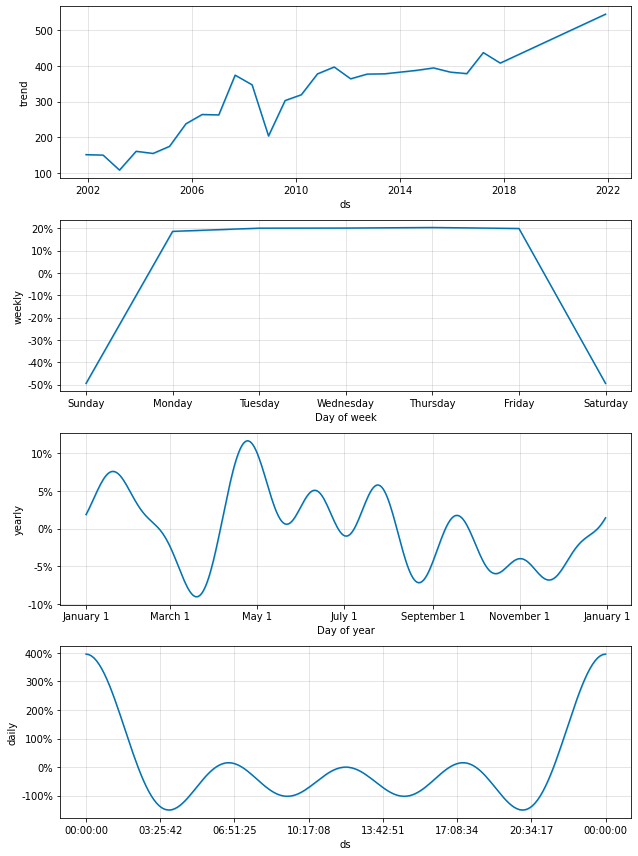

In [203]:
fig2 = prophet.plot_components(forecast_data)

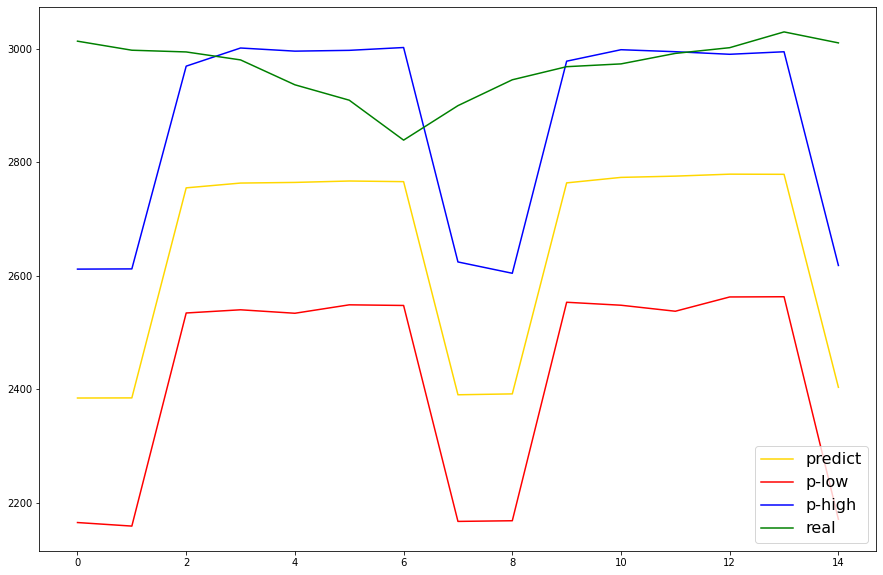

In [199]:
plt.figure(figsize=(15, 10))
pred_fbprophet_y = forecast_data.yhat.values[-15:]

test_y = df_kk_test.y.values

pred_y_lower = forecast_data.yhat_lower.values[-15:]

pred_y_upper = forecast_data.yhat_upper.values[-15:]

plt.plot(pred_fbprophet_y, color = 'gold')

plt.plot(pred_y_lower, color = 'red')

plt.plot(pred_y_upper, color = 'blue')

plt.plot(test_y, color = 'green')

plt.legend(['predict', 'p-low','p-high','real'])


In [200]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.



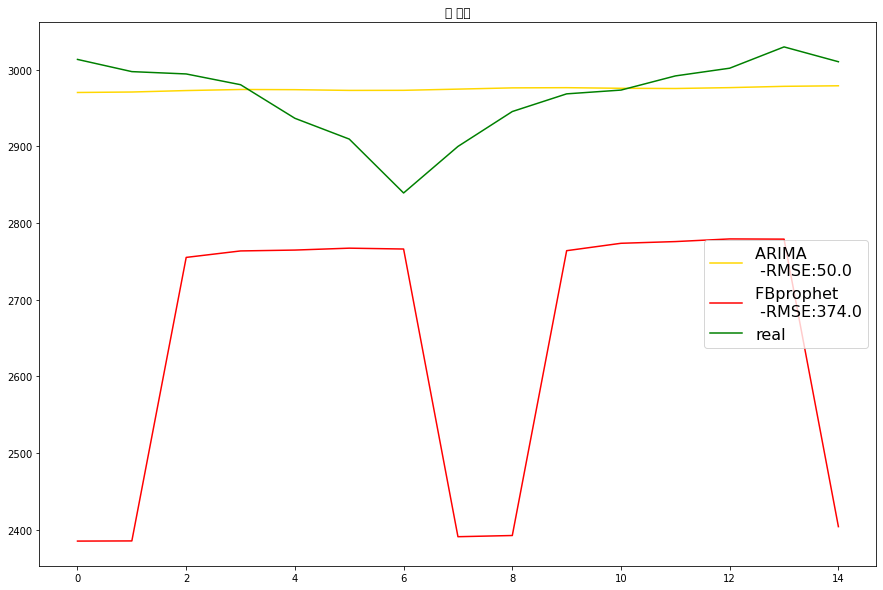

In [202]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

plt.plot(df[['ARIMA 예측값']], color = 'gold')

plt.plot(df[['FBprophet 예측값']], color = 'red')

plt.plot(df[['실제값']], color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'real'])
plt.title("값 비교")

In [247]:
df = fdr.DataReader(symbol='035720',start='2001-12-10')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-12-10,6548,6923,6263,6852,2248699,0.066625
2001-12-11,6692,6763,6433,6478,977473,-0.054583
2001-12-12,6602,7217,6566,6977,2356569,0.077030
2001-12-13,6869,7307,6709,6995,2246918,0.002580
2001-12-14,6789,7066,6522,6549,948617,-0.063760
...,...,...,...,...,...,...
2021-12-06,122500,122500,120500,121000,1477396,-0.020243
2021-12-07,121500,122000,120000,120500,1218740,-0.004132
2021-12-08,121500,123500,120500,121000,2288195,0.004149


In [248]:
samsung_dfA = df[["Volume"]]

samsung_dfA = samsung_dfA.reset_index()

samsung_dfA.columns = ['day', 'volume']

samsung_dfA

,day,volume
0,2001-12-10,2248699
1,2001-12-11,977473
2,2001-12-12,2356569
3,2001-12-13,2246918
4,2001-12-14,948617
...,...,...
4940,2021-12-06,1477396
4941,2021-12-07,1218740
4942,2021-12-08,2288195
4943,2021-12-09,2338843


In [249]:
samsung_dfA['volume']=np.log(samsung_dfA['volume'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [250]:
samsung_dfA

,day,volume
0,2001-12-10,14.625862
1,2001-12-11,13.792726
2,2001-12-12,14.672717
3,2001-12-13,14.625070
4,2001-12-14,13.762760
...,...,...
4940,2021-12-06,14.205792
4941,2021-12-07,14.013328
4942,2021-12-08,14.643274
4943,2021-12-09,14.665167


In [251]:
samsung_dfA['day'] = pd.to_datetime(samsung_dfA['day'])

samsung_dfA.index = samsung_dfA['day']
samsung_dfA.set_index('day', inplace=True)
samsung_dfA

,volume
day,
2001-12-10,14.625862
2001-12-11,13.792726
2001-12-12,14.672717
2001-12-13,14.625070
2001-12-14,13.762760
...,...
2021-12-06,14.205792
2021-12-07,14.013328
2021-12-08,14.643274


In [252]:
samsung_train_dfA = samsung_dfA[:-15]
samsung_train_dfA
samsung_test_dfA = samsung_dfA[-15:]
samsung_test_dfA

,volume
day,
2021-11-22,14.609991
2021-11-23,14.499213
2021-11-24,14.278638
2021-11-25,14.882406
2021-11-26,14.333733
2021-11-29,14.524277
2021-11-30,15.152407
2021-12-01,14.209295
2021-12-02,14.522610


In [ ]:
#삼성전자로 분석했을때와 마찬가지로 아리마 모델의 성능이 더 좋게 나옴
#